In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from scipy.optimize import newton
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pypvcell.solarcell import HighPSQCell,DiodeSeriesConnect
from pypvcell.illumination import load_astm

In [3]:
hp1=HighPSQCell(1.42,cell_T=300)

In [4]:
test_v=np.linspace(-1,1,10)

In [5]:
hp1.get_j_from_v(test_v)

array([  2.51468640e-33,   1.36036085e-29,   7.35909517e-26,
         3.98102324e-22,   2.15359982e-18,   1.16502515e-14,
         6.30239462e-11,   3.40938374e-07,   1.84436206e-03,
         9.97737906e+00])

In [6]:
hp1.get_j_from_v(test_v,to_tup=True)

(0, array([  2.51468640e-33,   1.36036085e-29,   7.35909517e-26,
          3.98102324e-22,   2.15359982e-18,   1.16502515e-14,
          6.30239462e-11,   3.40938374e-07,   1.84436206e-03,
          9.97737906e+00]))

In [7]:
hp1.set_input_spectrum(load_astm())

In [8]:
test_i=hp1.get_j_from_v(test_v,to_tup=True)
print(test_i)

(-320.42957639087012, array([  2.51468640e-33,   1.36036085e-29,   7.35909517e-26,
         3.98102324e-22,   2.15359982e-18,   1.16502515e-14,
         6.30239462e-11,   3.40938374e-07,   1.84436206e-03,
         9.97737906e+00]))


In [9]:
hp1.get_v_from_j(test_i)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

In [10]:
hp1.get_v_from_j_numerical(-hp1.jsc)

0.0

In [11]:
hp1.get_v_from_j((-hp1.jsc+0.01,0))

0.82147931848280387

In [12]:
hp1.get_v_from_j_numerical(-320,3.0)

3.0

In [13]:
hp1.get_j_from_v(0.1,to_tup=True)

(-320.42957639087012, 7.5801322803264188e-15)

In [14]:
hp1.get_single_j_from_v_bisect_fancy(1.0,(-hp1.jsc,-20))

9.9773790642823901

In [15]:
hp2=HighPSQCell(1.42,cell_T=300)
hp2.set_input_spectrum(0.2*load_astm())
hp3=HighPSQCell(1.42,cell_T=300)
hp3.set_input_spectrum(0.4*load_astm())
d1=DiodeSeriesConnect([hp1,hp2,hp3])

In [16]:
v,i=d1.construct_iv()

ValueError: too many values to unpack (expected 2)

In [ ]:
test_v=np.linspace(-5,1.1,num=100)

In [ ]:
i1=hp1.get_j_from_v(test_v)
i2=hp2.get_j_from_v(test_v)
i3=hp3.get_j_from_v(test_v)
plt.plot(test_v,i1)
plt.plot(test_v,i2)
plt.plot(test_v,i3)

In [17]:
plt.plot(v,i)

NameError: name 'v' is not defined

In [18]:
d1.get_single_j_from_v(1.0)

-64.08591527817403

In [19]:
d1.get_j_from_v(1.0)

-64.08591527817403

## Colored diode series cell

In [77]:
top_cell=HighPSQCell(1.87,cell_T=300)
mid_cell=HighPSQCell(1.42,cell_T=300)
bot_cell=HighPSQCell(0.67,cell_T=300)

In [78]:
d2=DiodeSeriesConnect([top_cell,mid_cell,bot_cell])

In [79]:
d2.set_input_spectrum(load_astm())

In [80]:
top_cell.jsc,mid_cell.jsc,bot_cell.jsc

(177.20068713393488, 142.85873837509928, 290.06121167808431)

In [81]:
v=np.linspace(-1,2.9,100)
j=d2.get_j_from_v(v)

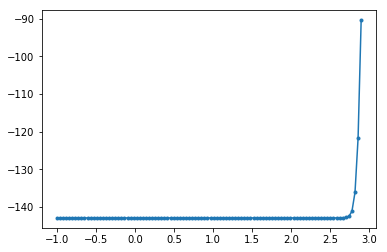

In [82]:
plt.plot(v,j,'.-')

In [83]:
import copy

In [84]:
d3=copy.deepcopy(d2)
d3.set_input_spectrum(0.1*load_astm())
d5=copy.deepcopy(d3)
d5.set_input_spectrum(0.2*load_astm())

In [85]:
d4=DiodeSeriesConnect([d2,d3,d5])

In [86]:
v=np.linspace(-2,8.7,100)
j=d4.get_j_from_v(v)

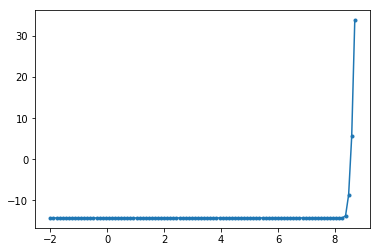

In [87]:
plt.plot(v,j,'.-')

In [88]:
print(j)

[-14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587384 -14.28587384 -14.28587384 -14.28587384 -14.28587384
 -14.28587